# Regression

## Second Hand Cars Prices

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [37]:
df = pd.read_csv(r'\Users\97254\Desktop\Second Hand Cars.csv')
df

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


### Data Dictionary Of The Various Features
**v.id** - indexes of vehicles

 <font size="1">'on the road price' covers everything you’ll have to pay to get your new car on the road. It includes the car’s list price, registration and delivery fees, and a year’s road tax ext.</font>

**on road old** - 'on the road price' when the car was new

**on road now** - 'on the road price' right now

**years**- how many years the car have been used (2-7)

**km** - the number of kilometers the vehicle traveled 

**rating** - a score given to the vehicle for its evaluation (1-5)

**condition** - a score given to the vehicle that represent its condition (1-10)

**economy** - a score given to the vehicle that represent its economical level (8-15)

**top speed** - the highest speed the vehicle reaches

**hp** - the vehicle's horsepower

**torque** - the vehicle's torque

**current price** - the price of the vehicle

As we can see, we do not need the 'v.id' column, since we have the index column automatically.<br> We'll remone this column.

In [38]:
df = df.drop(columns = ['v.id'])
df.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [39]:
df.shape

(1000, 11)

There are 1000 subjects and 11 features in the dataset.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   on road old    1000 non-null   int64  
 1   on road now    1000 non-null   int64  
 2   years          1000 non-null   int64  
 3   km             1000 non-null   int64  
 4   rating         1000 non-null   int64  
 5   condition      1000 non-null   int64  
 6   economy        1000 non-null   int64  
 7   top speed      1000 non-null   int64  
 8   hp             1000 non-null   int64  
 9   torque         1000 non-null   int64  
 10  current price  1000 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


There are no NaN values in this dataset. We can see that the dataset is clean and ready to work with.

In [43]:
df.describe()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


# Vizualization

For learning and understanding the dataset we'll vizualize it. <br>
### How is the dataset divided?

Text(0.5, 1.0, 'Cars Condition Up To 10')

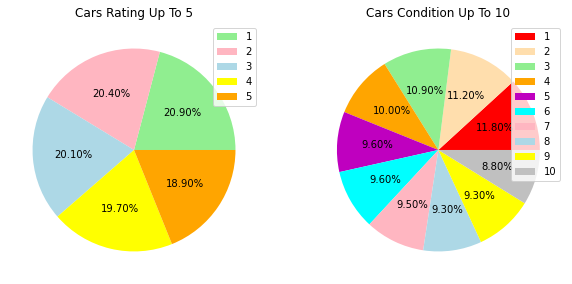

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie(df['rating'].value_counts(), colors = ['lightgreen', 'lightpink' , 'lightblue' , 'yellow' , 'orange'], autopct = '%.2f%%')
ax1.legend(["1" , "2" , "3" , "4" , "5"] , loc=1)

ax2.pie(df['condition'].value_counts(), colors = ['red' ,'navajowhite' , 'lightgreen', 'orange', 'm' , 'cyan' , 'lightpink' , 'lightblue' , 'yellow' , 'silver'], autopct = '%.2f%%')
ax2.legend(["1" , "2" , "3" , "4" , "5" , "6" , "7" , "8" , "9" , "10"] , loc=1)

ax1.set_title('Cars Rating Up To 5')
ax2.set_title('Cars Condition Up To 10')

We can see that the Rating and Condition columns are evenly divided, which means that we have subjets from all categories.<br>
we'll check if also the ages of the vehicles are evenly divided.

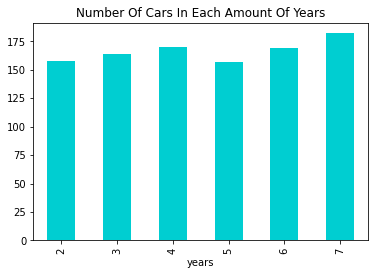

In [45]:
df.groupby(df.years).size().plot(kind='bar' , color='darkturquoise' , title='Number Of Cars In Each Amount Of Years')

There are vehicles from all ages which means the dataset is well diverse.<br>
Let's look at the prices of the cars.

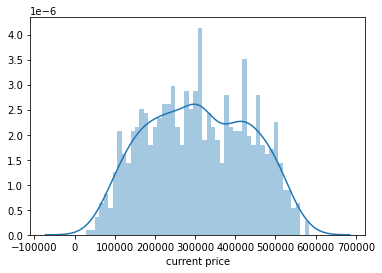

In [46]:
sns.distplot(df['current price'], bins = 50)

There is a Gauss distribution in the prices. <br>
This makes a lot of sense since the price of most vehicles is not extremely expensive or extremely cheap. <br>
We'll try to look if there are outliers.

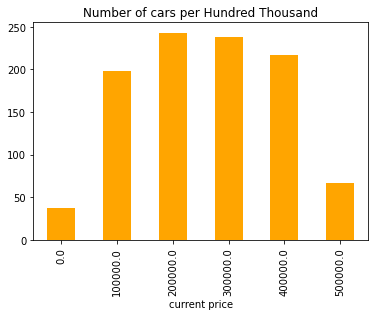

In [47]:
df.groupby(df['current price'] // 100000 * 100000).size().plot(kind='bar' , color='orange' , title='Number of cars per Hundred Thousand')

As we saw in the description table, and as we can see from this plot, most of the vehicles are between 100000 to 500000.<br>
Therefor we can understand that under 50000 and above 550000 will be an outlier.

In [48]:
df = df.drop(df[(df['current price'] >550000)].index)
df = df.drop(df[(df['current price'] <50000)].index)
df.shape

(988, 11)

We only dropped 12 subjects which is very goog.<br>
Let's look at the scatter of the data in relation to the price of the vehicles.

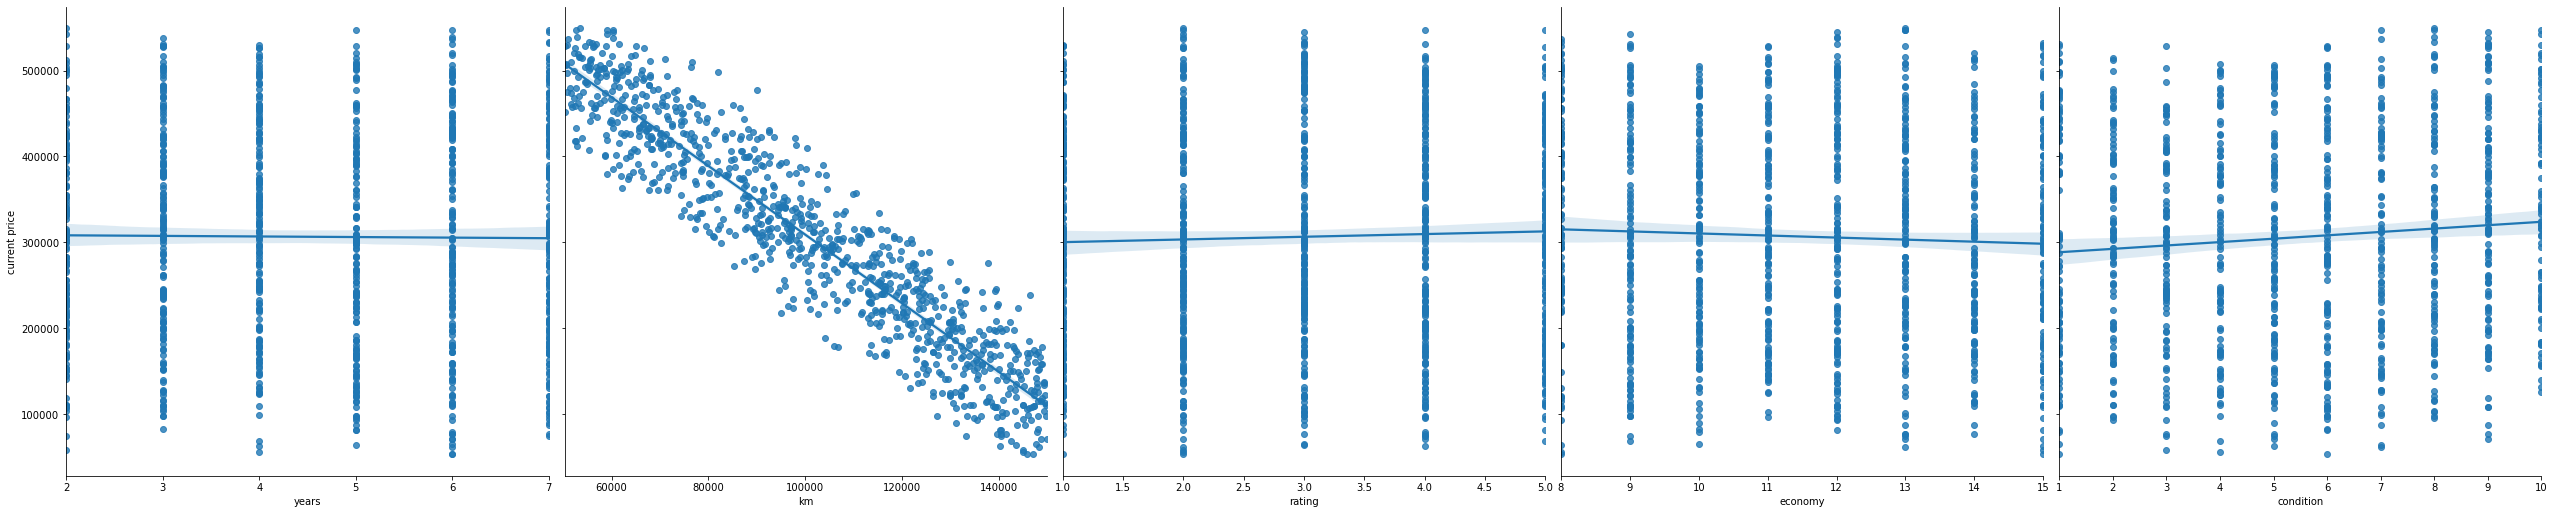

In [49]:
sns.pairplot(df, x_vars=['years', 'km','rating' ,'economy', 'condition'], 
                 y_vars='current price', height=7, aspect=1, kind='reg')

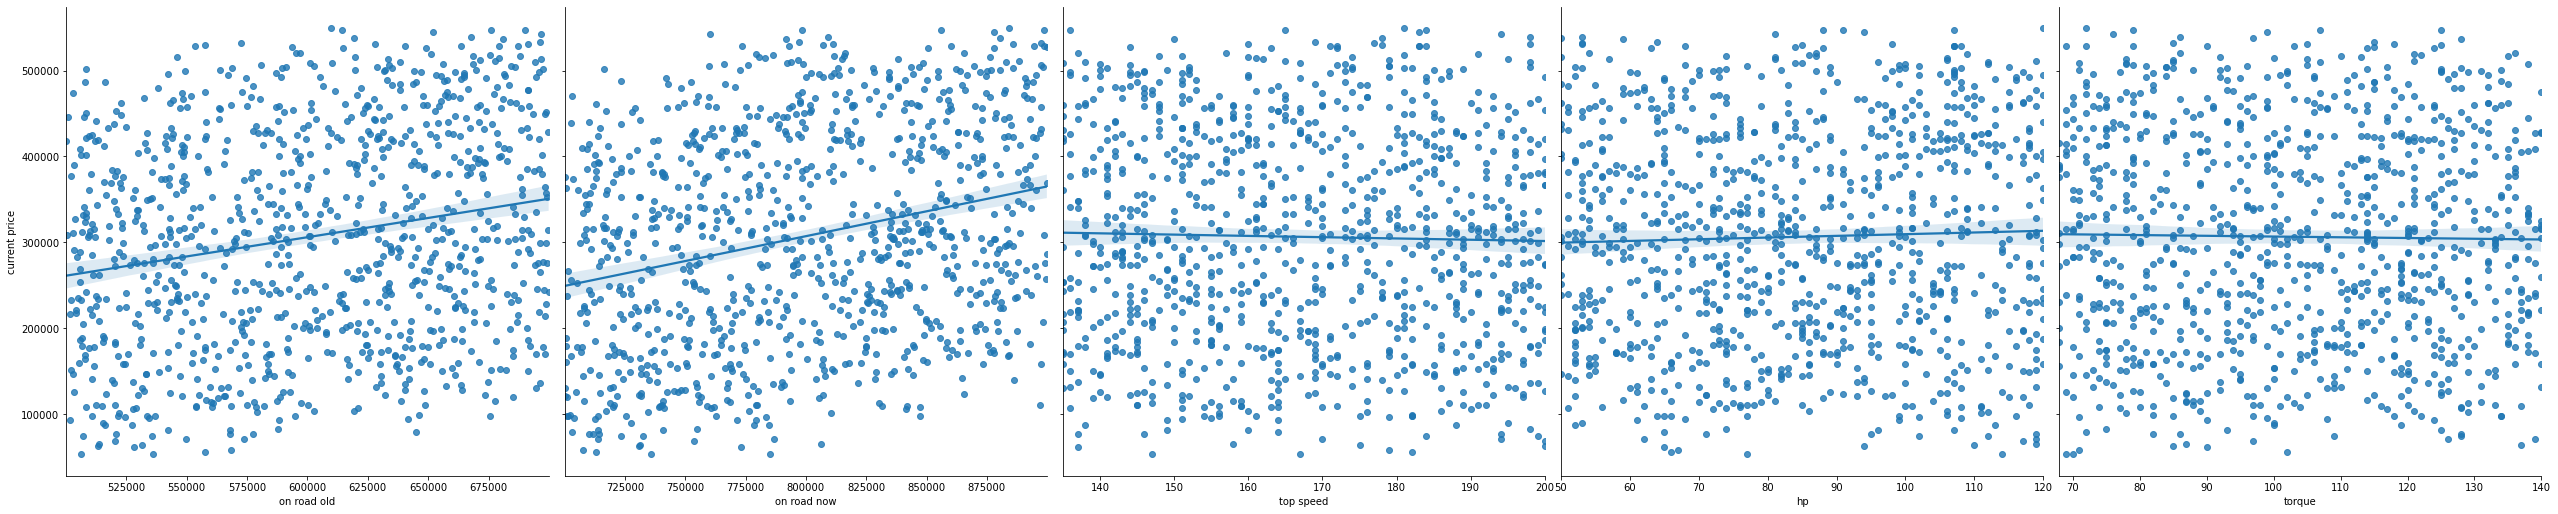

In [50]:
sns.pairplot(df, x_vars=['on road old','on road now','top speed','hp','torque'], 
                 y_vars='current price', height=7, aspect=1, kind='reg')

As we probably guessed, the most price-related feature is the km. <br> We will look at it in a 3D graph and add the years feature too.

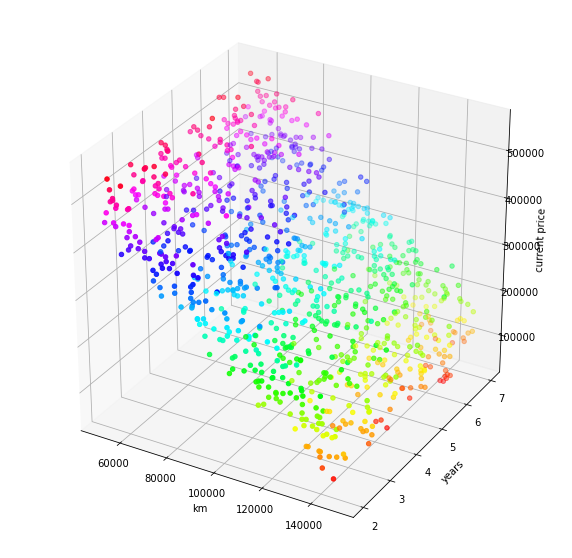

In [51]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = df['current price']
x_points = df['km']
y_points = df['years']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_zlabel('current price')
ax.set_xlabel('km')
ax.set_ylabel('years')

plt.show()

As we can see, the amount of kilometers does not have to do with the age of the car but definetly has an enormous impact on the price of the vehicles.<br>
We will look at it again when we'll get to modelling.

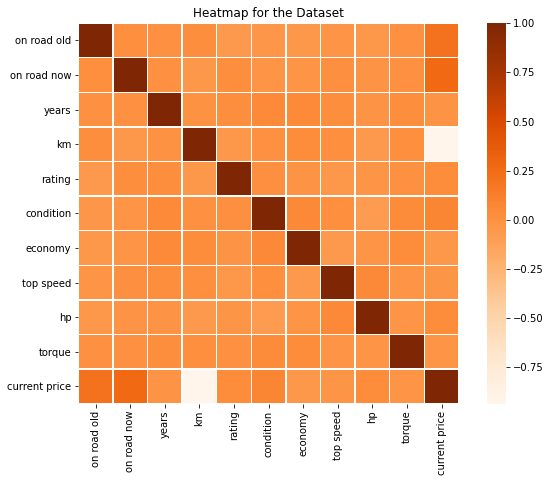

In [52]:
# making a heat map
plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), linewidths=0.4 , square=True, cmap = 'Oranges')
plt.title('Heatmap for the Dataset')
plt.show()

The above heat map is showing us the correlations amongst the different features of the dataset. <br> We can see that all of the features are very less correlated with each other. <br> This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.<br><br>
After understanding the dataset we can find a suitable model.

# Modelling & Evaluating

In [53]:
# import models and Model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
X = df.drop('current price', axis=1)
y = df['current price']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(691, 10)
(297, 10)
(691,)
(297,)


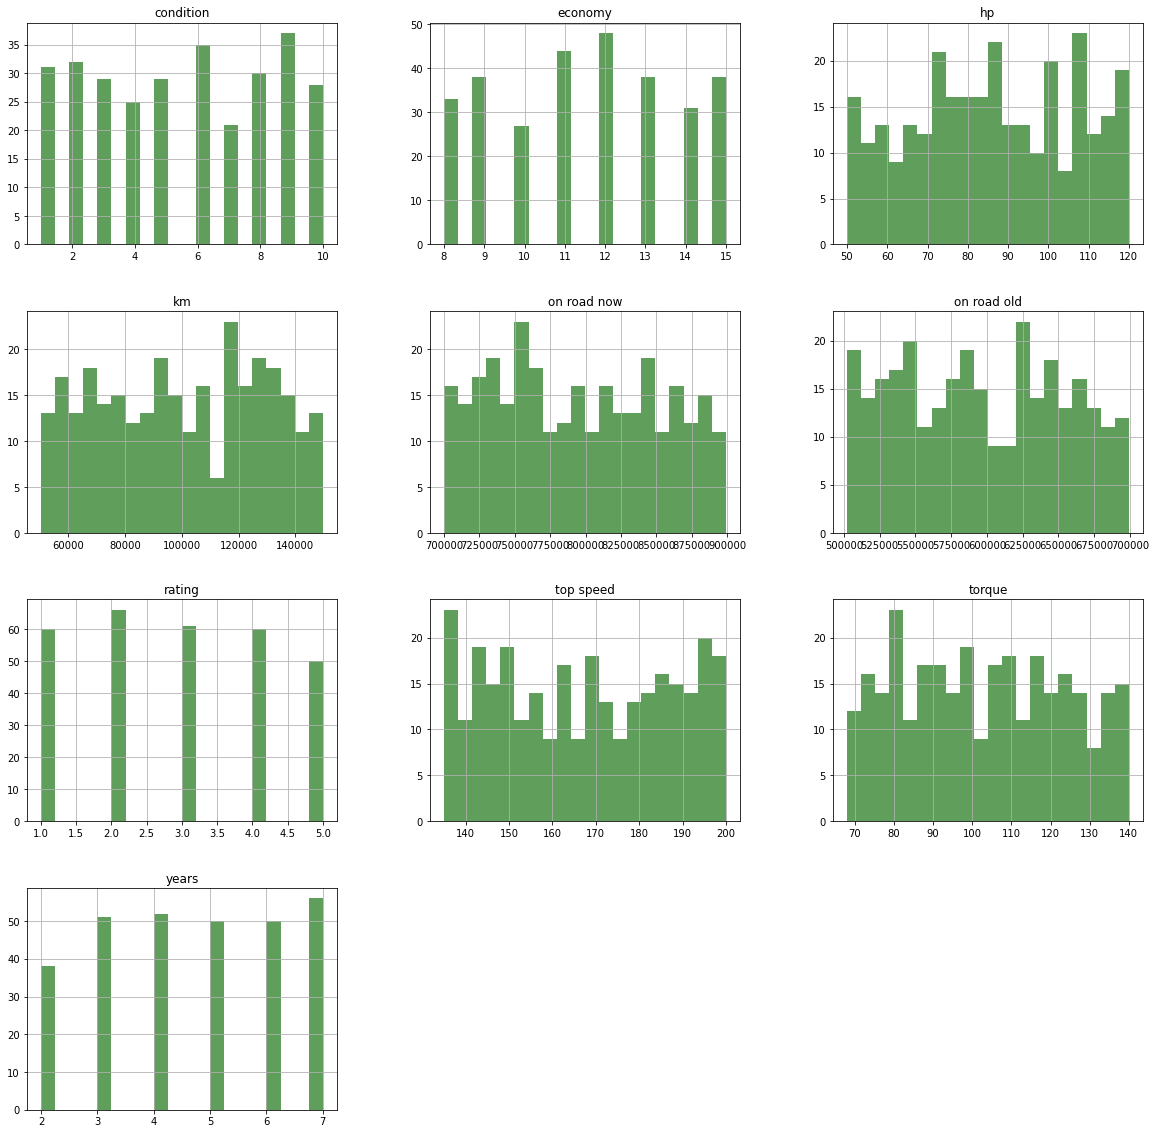

In [56]:
X_test.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.show()

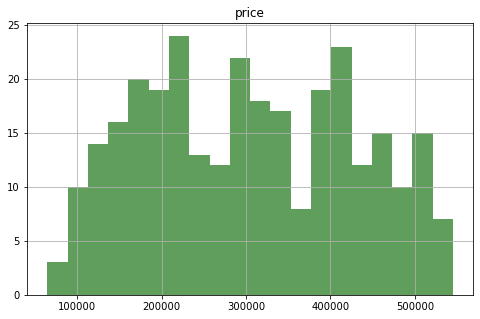

In [57]:
y_test.hist(figsize=(8,5),bins = 20, color="#107009AA")
plt.title("price")
plt.show()

All data looks evenly divided in the testing set. <br>
Before starting the modelling, let's see the few ways of evaluating the score of the model.

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

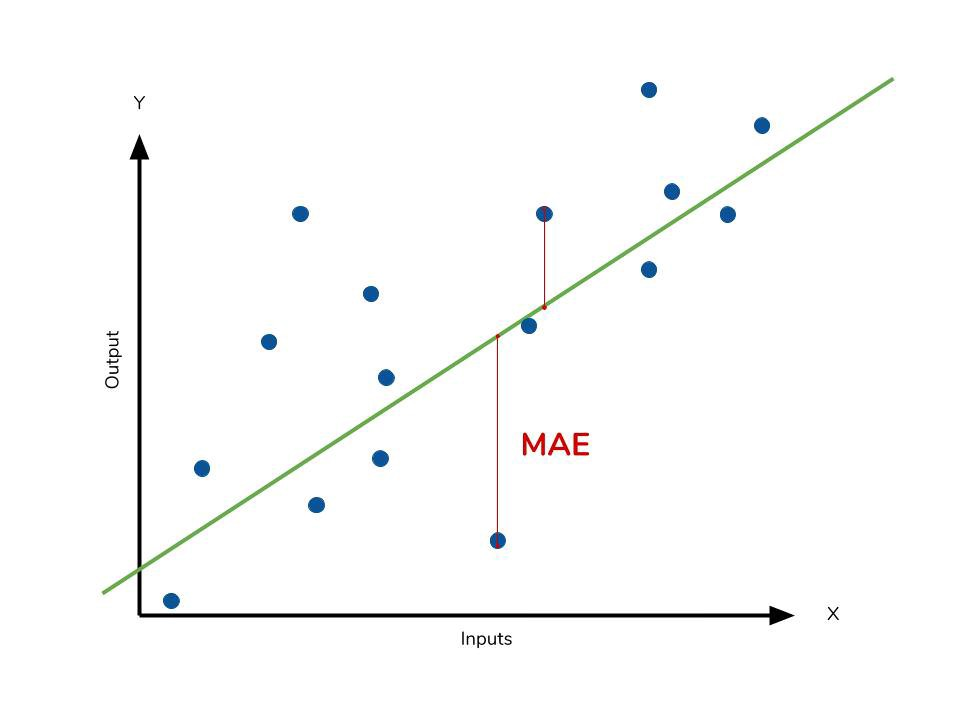

**R Squared** ($R^2$) if $\bar {y}$ is the mean of the observed data then
$${\displaystyle SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$$
$${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}}$$
$${\displaystyle R^{2}=1-{SS_{\rm {res}} \over SS_{\rm {tot}}}\,}$$

We'll define a new function that we'll be used for each model, and show us the different accuracy scores.

In [58]:
def calcAccuracy(regressionModels):
    
    # fit the model to the training data
    model = regressionModels().fit(X_train, y_train)
    # make predictions on the testing set
    y_pred = model.predict(X_test)
 
    modelsName = regressionModels.__name__
    
    print(modelsName,':')
    print("Accuracy (R2):", round(r2_score(y_test, y_pred)*100,2), "%")
    print("MAE:", round(mean_absolute_error(y_test, y_pred),4))
    print("MSE:", round(mean_squared_error(y_test, y_pred),4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
    print()
    return round(r2_score(y_test, y_pred), 4)

We'll define another new function that will save all predicted values of all models, so we can see the differences between them.

In [59]:
modelsPredictionComparison = pd.DataFrame(np.array(y_test) , columns=["Real Price"])
def DFofPreVal(regressionModels , modelsPredictionComparison):
    
    # fit the model to the training data
    model = regressionModels().fit(X_train, y_train)
    # make predictions on the testing set
    y_pred = model.predict(X_test)

    #add the prediction to the df
    modelsName = regressionModels.__name__
    modelsNameForDf=modelsName+" Predicted Price"
    return pd.DataFrame(y_pred , columns=[modelsNameForDf])

Using the first function, we'll look for the best model out of 3 models.

In [60]:
models = [LinearRegression,
          DecisionTreeRegressor, 
          KNeighborsRegressor]

results={}

best=0
bestModel="a"
for i in models:
    checkeBest = calcAccuracy(i)
    results[i.__name__]=checkeBest
    if (checkeBest>best):
        bestModel=i
        best=checkeBest

print("The best model is " ,bestModel.__name__, ", and the R2 score is " , round(best , 4) ,"=" ,round(best*100,2), "% .")

LinearRegression :
Accuracy (R2): 99.49 %
MAE: 7256.3188
MSE: 77473959.0325
RMSE: 8801.9293

DecisionTreeRegressor :
Accuracy (R2): 94.15 %
MAE: 23343.3451
MSE: 888438941.0328
RMSE: 29806.6929

KNeighborsRegressor :
Accuracy (R2): 95.17 %
MAE: 21404.5822
MSE: 734057641.847
RMSE: 27093.4981

The best model is  LinearRegression , and the R2 score is  0.9949 = 99.49 % .


Using the second function, we'll see all predicted values as a Data Frame.

In [61]:
for i in models:
    yPredDf=DFofPreVal(i,modelsPredictionComparison)
    modelsPredictionComparison = pd.concat([modelsPredictionComparison,yPredDf] , axis=1)
    
modelsPredictionComparison

,Real Price,LinearRegression Predicted Price,DecisionTreeRegressor Predicted Price,KNeighborsRegressor Predicted Price
0,315959.0,321138.880534,327454.5,317546.2
1,128632.5,135938.784775,104215.0,154236.8
2,510361.5,505668.944685,467395.0,478986.7
3,249765.5,260592.421083,256476.5,279756.8
4,331687.0,334241.965676,344339.5,318653.1
...,...,...,...,...
292,131893.5,139212.914861,149141.5,167164.1
293,217446.0,218262.396910,271956.0,228252.4
294,224745.0,227202.772949,206999.5,235493.2
295,343416.5,342564.408828,337257.0,326046.7


We can see that Linear Regression really do have the most close predicted values.<br>
Notice that Linear Regression Model gives the most accurate number (6 numbers after the point) , which means it also tries its best to have the perfect predicted price.<br>
Let's look at our graph of R squared score:

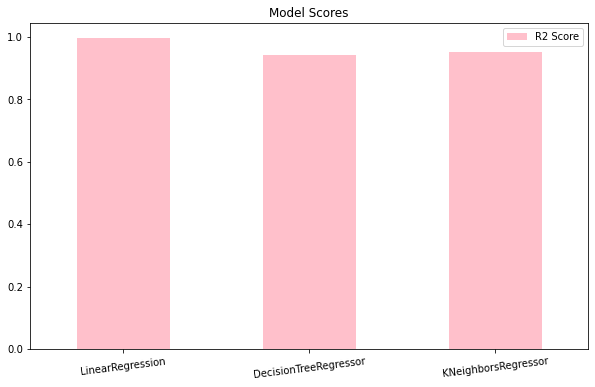

In [62]:
results = pd.DataFrame.from_dict(results,orient='index')
results.columns=["R2 Score"] 
results.plot(kind="bar",title="Model Scores" , color='pink' , rot=7 , figsize=(10,6))

Before we conclude, we saw at the begging that 'km' is a feature that have a huge impact on the price.<br>
Let's check what would happen to the models if we'll remove this feature.

In [63]:
kmDrop = df.drop('km', axis=1)
XkmDrop = kmDrop.drop('current price', axis=1)
ykmDrop = kmDrop['current price']

# split the data into train and test sets
XkmDrop_train, XkmDrop_test, ykmDrop_train, ykmDrop_test = train_test_split(XkmDrop, ykmDrop, test_size=0.3, shuffle=True)

In [64]:
models = [LinearRegression,
          DecisionTreeRegressor, 
          KNeighborsRegressor]

for i in models:
    model = i().fit(XkmDrop_train, ykmDrop_train)
    # make predictions on the testing set
    y_pred = model.predict(XkmDrop_test)
 
    modelsName = i.__name__
    
    print(modelsName,':')
    print("Accuracy (R2):", round(r2_score(ykmDrop_test, y_pred)*100,2), "%")
    print("MAE:", round(mean_absolute_error(ykmDrop_test, y_pred),4))
    print("MSE:", round(mean_squared_error(ykmDrop_test, y_pred),4))
    print("RMSE:", round(np.sqrt(mean_squared_error(ykmDrop_test, y_pred)),4))
    print()

LinearRegression :
Accuracy (R2): 11.55 %
MAE: 100761.4084
MSE: 13502698282.8992
RMSE: 116201.1114

DecisionTreeRegressor :
Accuracy (R2): -86.55 %
MAE: 135949.2374
MSE: 28478206136.9234
RMSE: 168754.87

KNeighborsRegressor :
Accuracy (R2): -7.6 %
MAE: 106423.7158
MSE: 16425384710.7321
RMSE: 128161.5571



In [65]:
modelsPredictionComparison2 = pd.DataFrame(np.array(y_test) , columns=["Real Price"])
for i in models:
    # fit the model to the training data
    model = i().fit(XkmDrop_train, ykmDrop_train)
    # make predictions on the testing set
    y_pred = model.predict(XkmDrop_test)

    #add the prediction to the df
    modelsName = i.__name__
    modelsNameForDf = modelsName+" Predicted Price"
    yPredDf = pd.DataFrame(y_pred , columns=[modelsNameForDf])
    modelsPredictionComparison2 = pd.concat([modelsPredictionComparison2,yPredDf] , axis=1)
    
modelsPredictionComparison2

,Real Price,LinearRegression Predicted Price,DecisionTreeRegressor Predicted Price,KNeighborsRegressor Predicted Price
0,315959.0,338471.753343,528418.5,292702.7
1,128632.5,274687.973889,421781.0,206450.2
2,510361.5,306352.833903,329538.5,355942.4
3,249765.5,296631.361042,515454.0,277204.1
4,331687.0,292414.965147,186388.5,338439.7
...,...,...,...,...
292,131893.5,226364.469080,170838.5,173811.6
293,217446.0,309036.850163,248983.0,357761.5
294,224745.0,306428.763510,102144.5,265207.2
295,343416.5,274550.875035,304818.0,265779.3


As we guessed, the predicted values went very bad and the R2 score is low and unhelpful.<br>
We'll just notice that also in this bad situation, Linear Regression Model have the highest score. <br>
Let's check also the other way.<br>
What would happen to the models if we'll remove all feature apart from 'km' ?

In [66]:
drop = df.drop(['on road old' , 'on road now' , 'years' , 'rating' , 'condition' , 'economy' ,'top speed' ,'hp','torque'], axis=1)
XDrop = drop.drop('current price', axis=1)
yDrop = drop['current price']

# split the data into train and test sets
XDrop_train, XDrop_test, yDrop_train, yDrop_test = train_test_split(XDrop, yDrop, test_size=0.3, shuffle=True)

In [67]:
models = [LinearRegression,
          DecisionTreeRegressor, 
          KNeighborsRegressor]

for i in models:
    model = i().fit(XDrop_train, yDrop_train)
    # make predictions on the testing set
    y_pred = model.predict(XDrop_test)
 
    modelsName = i.__name__
    
    print(modelsName,':')
    print("Accuracy (R2):", round(r2_score(yDrop_test, y_pred)*100,2), "%")
    print("MAE:", round(mean_absolute_error(yDrop_test, y_pred),4))
    print("MSE:", round(mean_squared_error(yDrop_test, y_pred),4))
    print("RMSE:", round(np.sqrt(mean_squared_error(yDrop_test, y_pred)),4))
    print()

LinearRegression :
Accuracy (R2): 88.07 %
MAE: 36072.3972
MSE: 1931321422.6678
RMSE: 43946.8022

DecisionTreeRegressor :
Accuracy (R2): 75.87 %
MAE: 50137.4781
MSE: 3906682434.1801
RMSE: 62503.4594

KNeighborsRegressor :
Accuracy (R2): 86.42 %
MAE: 38523.436
MSE: 2198785915.7511
RMSE: 46891.2136



Totally different situation from the previous.<br>
Although the scores are not like the first ones we got, they are definitely better when there is only the column 'km' than when it does not exist.<br>
And yet we note that Linear Regression have the highest score again.

# Conclusion

After checking those 3 models we understood that the Linear Regression model is the best for this dataset, since it's accuracy (R2) is the highest.<br>
In addition, the column 'km' is the biggest influencer on the price and therefore its impact on the model is the greatest.